# Ejercicio Nº1:
Programar en OCTAVE el método de descomposición LU para la resolución de sistemas de ecuaciones lineales del tipo A*x=b con A ∈ R(n×n). Utilizar matrices random (A = rand(n, n)) y soluciones random (x = rand(n, 1)) de manera de obtener b y poder comparar la solución obtenida con la exacta.

    a) Medir el tiempo de cálculo para diferentes tamaños de la matriz A para mostrar que el método es de orden N3. Verifique en cada caso que su algoritmo efectivamente resuelve el sistema.
   
    b) Agregar pivoteo parcial a su algoritmo. Reemplace el elemento a_11 de su matriz por el valor 10^−10 y evalúe si hay diferencias en cuanto a la precisión de la solución obtenida entre al algoritmo original y el que  incluye el pivoteo. Recuerde que para aplicar el método de pivoteo a la resolución de un sistema A*x=b, es  necesario registrar las permutaciones hechas sobre las filas de la matriz y aplicarlas al vector. Verifique en  cada caso que su algoritmo efectivamente resuelve el sistema.

In [1]:
function [L,U]=Factorize_LU(U,N)
    L = eye(N,N);
    for k=1:N-1
        for i=k+1:N
            L(i,k) = U(i,k)/U(k,k);
            for j=1:N
                U(i,j) = U(i,j)-L(i,k)*U(k,j);
            end
        end
    end
endfunction

function [L,U,P]=Factorize_LU_Pivoteo(U,N)
    L = eye(N,N);
    P = eye(N,N);
    for k=1:N-1
        [U,L,P] = Pivotear(U,L,P,N,k);
        for i=k+1:N
            L(i,k) = U(i,k)/U(k,k);
            for j=1:N
                U(i,j) = U(i,j)-L(i,k)*U(k,j);
            end
        end
    end
endfunction

function [U,L,P]=Pivotear(U,L,P,N,col)
    [val, pos] = max(abs(U(col:N,col)));
    pos = pos+col-1;
    if (col~=pos)
        tmp = U(col,:);
        U(col,:) = U(pos,:);
        U(pos,:) = tmp;
        
        Pk = eye(N,N);
        Pk(col,col) = 0;
        Pk(pos,pos) = 0;
        Pk(pos,col) = 1;
        Pk(col,pos) = 1;
        P = Pk*P;
    
        if (col>1)
            tmp = L(col,1:col-1);
            L(col,1:col-1) = L(pos,1:col-1);
            L(pos,1:col-1) = tmp;
        end
    end
endfunction

function x=ForwardSustitution(A,b,N)
    x = b;
    for i=1:N
        for j=1:i-1
            x(i)=x(i)-A(i,j)*x(j);
        end
        x(i) = x(i)/A(i,i);
    end
endfunction

function x=BackwardSustitution(A,b,N)
    x=b;
    for k=1:N
        i=N-k+1;
        for j=i+1:N
            x(i)=x(i)-A(i,j)*x(j);
        end
        x(i) = x(i)/A(i,i);
    end
endfunction

function x=LinearSolver_LU(A,b)
    N = size(A)(1);
    [L,U] = Factorize_LU(A,N);
    y = ForwardSustitution(L,b,N);
    x = BackwardSustitution(U,y,N);
endfunction

function x=LinearSolver_LU_Pivoteo(A,b)
    N = size(A)(1);
    [L,U,P] = Factorize_LU_Pivoteo(A,N);
    y = ForwardSustitution(L,P*b,N);
    x = BackwardSustitution(U,y,N);
endfunction

function x=LinearSolver_LU_Pivoteo_lapack(A,b)
    N = size(A)(1);
    [L,U,P] = lu(A);
    
    # utilizo la funcion interna de octave, pues
    # realiza sustitución hacia atras o adenlante
    # si la matriz es triangular.
    # y = ForwardSustitution(L,P*b,N);
    # x = BackwardSustitution(U,y,N);
    y = L\(P*b);
    x = U\y;
endfunction

function [a,b,r2]=LinearRegression(X,Y)
    if (size(X)(1)==1)
        X = X';
    end
    if (size(Y)(1)==1)
        Y = Y';
    end
    n = size(X)(1);
    G = [ones(n, 1) X];
    theta = (pinv(G'*G))*G'*Y;
    a = theta(2);
    b = theta(1);
    ssr = sum((Y-(a*X+b)).^2);
    Y_mean = mean(Y);
    sst = sum((Y-Y_mean*ones(n,1)).^2);
    r2 = 1-ssr/sst;
    printf("Ajuste lineal: y=%f*x+%f r^2=%f\n",a,b,r2);
endfunction

function A=GenerateSparseMatrix(n)
    N = 8*n^3;
    SD=sparse(1:N,1:N,6*ones(N,1),N,N);
    if1=setdiff(1:N-1, n:n:n*(8*n^2-1));
    SU1=sparse(if1,if1+1,-1*ones(1,(n-1)*8*n^2),N,N);
    [i, j]=find([ones(n*(2*n-1),4*n); zeros(n,4*n)]);
    if2=i+(j-1)*2*n^2;
    SU2=sparse(if2,if2+n,-1*ones(1,n*(2*n-1)*4*n),N,N);
    if3=1:2*n^2*(4*n-1);
    SU3=sparse(if3,if3+2*n^2,-1*ones(1,2*n^2*(4*n-1)),N,N);
    A=SD+SU1+SU1'+SU2+SU2'+SU3+SU3';
endfunction

function A=GenerateFullMatrix(n)
    N = 8*n^3;
    SD=sparse(1:N,1:N,6*ones(N,1),N,N);
    if1=setdiff(1:N-1, n:n:n*(8*n^2-1));
    SU1=sparse(if1,if1+1,-1*ones(1,(n-1)*8*n^2),N,N);
    [i, j]=find([ones(n*(2*n-1),4*n); zeros(n,4*n)]);
    if2=i+(j-1)*2*n^2;
    SU2=sparse(if2,if2+n,-1*ones(1,n*(2*n-1)*4*n),N,N);
    if3=1:2*n^2*(4*n-1);
    SU3=sparse(if3,if3+2*n^2,-1*ones(1,2*n^2*(4*n-1)),N,N);
    A=full(SD+SU1+SU1'+SU2+SU2'+SU3+SU3');
endfunction

Tamaño matriz A: 10x10
Tiempo de cálculo: 0.000295
Error abs.: 4.693413e-15
Tamaño matriz A: 1010x1010
Tiempo de cálculo: 0.092474
Error abs.: 5.056974e-12
Tamaño matriz A: 2010x2010
Tiempo de cálculo: 0.464239
Error abs.: 8.801196e-12
Tamaño matriz A: 3010x3010
Tiempo de cálculo: 1.263457
Error abs.: 5.607285e-11
Tamaño matriz A: 4010x4010
Tiempo de cálculo: 2.566319
Error abs.: 7.544723e-11
Tamaño matriz A: 5010x5010
Tiempo de cálculo: 4.804649
Error abs.: 6.882401e-11
Tamaño matriz A: 6010x6010
Tiempo de cálculo: 7.354709
Error abs.: 6.698792e-11
Tamaño matriz A: 7010x7010
Tiempo de cálculo: 11.368202
Error abs.: 8.544621e-11
Tamaño matriz A: 8010x8010
Tiempo de cálculo: 20.235461
Error abs.: 3.849959e-10
Tamaño matriz A: 9010x9010
Tiempo de cálculo: 26.467051
Error abs.: 3.060631e-10
Ajuste lineal: y=1.654444*x+-12.571409 r^2=0.960986


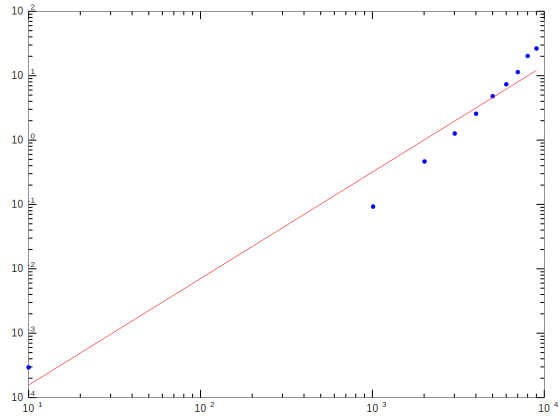

In [7]:
function [n,t,a,b,r2]=TestOrderOperationsLU(n0,nf,step)
    j=1;
    for i=n0:step:nf
        A = rand(i,i);
        b = rand(i,1);
        tic()
        x = LinearSolver_LU(A,b);
        t(j) = toc();
        n(j) = i;
        r = norm(b-A*x,2);
        if (r>1e-6)
            printf("WARNING: error too high. det(A)=%f\n",det(A))
        end
        printf("Tamaño matriz A: %ix%i\nTiempo de cálculo: %f\nError abs.: %e\n",i,i,t(j),r)
        j = j+1;
    end
    [a,b,r2] = LinearRegression(log(n),log(t));
    loglog(n,t,"b.");
    hold on;
    loglog(n,exp(log(n)*a+b),"r");
endfunction

[n,t,a,b,r2] = TestOrderOperationsLU(10,10000,1000);

In [2]:
function [e1,e2]=TestPresicionLU(N,n)
    for i=1:n
        A = rand(N,N);
        A(1,1) = 10e-10;
        x = rand(N,1);
        b = A*x;
        x1 = LinearSolver_LU(A,b);
        x2 = LinearSolver_LU_Pivoteo(A,b);
        e1(i) = norm(x-x1,2)/norm(x,2);
        e2(i) = norm(x-x2,2)/norm(x,2);
    end
    e1_m = mean(e1);
    de1 = std(e1);
    e2_m = mean(e2);
    de2 = std(e2);
    d_m = mean(e1-e2);
    dd = std(e1-e2);
    printf("Error sin pivoteo: %e±%e\n", e1_m,de1);
    printf("Error con pivoteo: %e±%e\n", e2_m,de2);
    printf("Diferencia en el error: %e±%e\n", d_m, dd);
endfunction

[e1,e2] = TestPresicionLU(10,100);

Error sin pivoteo: 2.300054e-05±2.119853e-04
Error con pivoteo: 1.341476e-14±6.037086e-14
Diferencia en el error: 2.300054e-05±2.119853e-04


# Ejercicio Nº2:

Se pretende resolver el sistema lineal A*x =b, donde A ∈ R(N×N) es una matriz heptadiagonal que surge típicamente en la discretización de problemas de difusión en 3D y b ∈ R(N) es un vector segundo miembro que podría pensarse como un término fuente en dicho problema de difusión.

Para el caso de una discretización uniforme con n, 2n y 4n puntos en las direcciones x, y y z respectivamente, la matriz A ∈ R(N×N), con N = 8*n^3, tiene elementos diferentes a cero (salvo excepciones en los bordes) en las siguientes posiciones:

    a_ii =6 si 1≤i≤N
    a_ij =(−1) si |i−j|=1
    a_ij =(−1) si |i−j|=n
    a_ij =(−1) s_i |i−j|=2*n^2

Dicha matriz puede ser almacenada como matriz “llena” (se guardan todos los elementos de la matriz) o como matriz “rala”, guardando solo los elementos no nulos y su posición.

    a) Utilizar la función pcg de OCTAVE que resuelve sistemas lineales mediante el método de gradientes conjugados con precondicionador para resolver el sistema descripto. Evaluar el tiempo de cálculo para diferentes tamaños de la matriz del sistema (por ejemplo hasta aproximadamente n = 20). Además, compare el tiempo de cálculo cuando se emplea el formato ralo o el formato lleno de almacenamiento. (No se preocupe por el hecho de que la matriz es rala pues OCTAVE “sabe” como operar con dichas matrices). Utilice los siguientes datos de entrada para llamar a la función: x0 = 0, tol = 10^−6 y MAXIT = N. No utilice precondicionador y verifique en cada caso que su algoritmo efectivamente resuelve el sistema.


pcg converged at iteration 39 with relative residual 8.44358e-07
pcg converged at iteration 39 with relative residual 8.44358e-07
j =  2
pcg converged at iteration 44 with relative residual 8.54263e-07
pcg converged at iteration 44 with relative residual 8.54263e-07
j =  3
pcg converged at iteration 50 with relative residual 9.79539e-07
pcg converged at iteration 50 with relative residual 9.79539e-07
j =  4
pcg converged at iteration 56 with relative residual 6.53823e-07
pcg converged at iteration 56 with relative residual 6.53823e-07
j =  5
pcg converged at iteration 62 with relative residual 6.99018e-07
pcg converged at iteration 62 with relative residual 6.99018e-07
j =  6
pcg converged at iteration 67 with relative residual 7.61796e-07
pcg converged at iteration 67 with relative residual 7.61796e-07
j =  7
pcg converged at iteration 73 with relative residual 8.0267e-07
pcg converged at iteration 73 with relative residual 8.0267e-07
j =  8
pcg converged at iteration 78 with relative

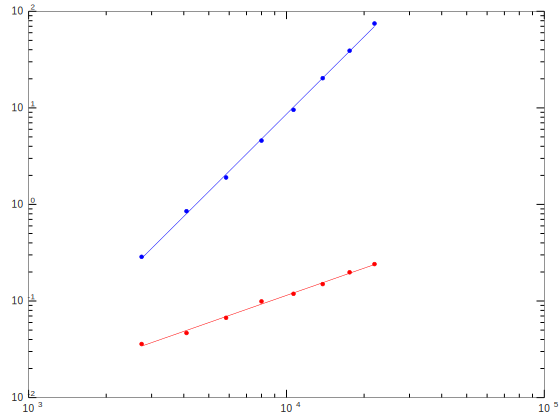

In [3]:
function [n,t_full,t_sparse]=TestOrderOperationsPCG_NP(n0,nf,step)
    j = 1;
    for n=n0:step:nf
        N = 8*n^3;
        A_full = GenerateFullMatrix(n);
        A_sparse = GenerateSparseMatrix(n);
        b = ones(N,1)/(n + 1)^2;
        x0 = zeros(N,1);
        tic();
        pcg(A_full,b,1e-6,N,[],[],x0);
        t_full(j) = toc();
        tic();
        pcg(A_sparse,b,1e-6,N,[],[],x0);
        t_sparse(j) = toc();
        j = j+1
    end
    n=n0:step:nf;
    x=8*n.^3;
    
    loglog(x,t_full,"b.");
    printf("\nFull matrix (blue):\n")
    [a,b,r2] = LinearRegression(log(x),log(t_full));
    hold on;
    loglog(x,exp(a*log(x)+b),"b");
    
    hold on;
    loglog(x,t_sparse,"r.");
    printf("\nSparse matrix (red):\n")
    [a,b,r2] = LinearRegression(log(x),log(t_sparse));
    hold on;
    loglog(x,exp(a*log(x)+b),"r");
endfunction

[n,t_full,t_sparse]=TestOrderOperationsPCG_NP(7,14,1);

pcg converged at iteration 39 with relative residual 8.44358e-07
j =  2
pcg converged at iteration 44 with relative residual 8.54263e-07
j =  3
pcg converged at iteration 50 with relative residual 9.79539e-07
j =  4
pcg converged at iteration 56 with relative residual 6.53823e-07
j =  5
pcg converged at iteration 62 with relative residual 6.99018e-07
j =  6
pcg converged at iteration 67 with relative residual 7.61796e-07
j =  7
pcg converged at iteration 73 with relative residual 8.0267e-07
j =  8
pcg converged at iteration 78 with relative residual 8.4303e-07
j =  9
pcg converged at iteration 84 with relative residual 8.56772e-07
j =  10
pcg converged at iteration 89 with relative residual 9.40504e-07
j =  11
pcg converged at iteration 95 with relative residual 9.58485e-07
j =  12
pcg converged at iteration 101 with relative residual 8.02884e-07
j =  13
pcg converged at iteration 106 with relative residual 9.90293e-07
j =  14
pcg converged at iteration 112 with relative residual 8.963

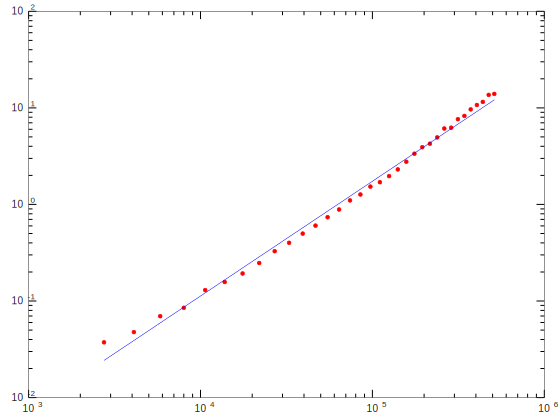

In [12]:
function [n,t]=TestOrderOperationsPCG_NP_SPARSE(n0,nf,step)
    j = 1;
    for n=n0:step:nf
        N = 8*n^3;
        A_sparse = GenerateSparseMatrix(n);
        b = ones(N,1)/(n + 1)^2;
        x0 = zeros(N,1);
        tic();
        pcg(A_sparse,b,1e-6,N,[],[],x0);
        t(j) = toc();
        j = j+1
    end
    n=n0:step:nf;
    x=8*n.^3;
    
    loglog(x,t,"r.");
    printf("\nSparse matrix (blue):\n")
    [a,b,r2] = LinearRegression(log(x),log(t));
    hold on;
    loglog(x,exp(a*log(x)+b),"b");
endfunction

[n,t]=TestOrderOperationsPCG_NP_SPARSE(7,40,1);

# Ejercicio Nº3:

Utilice ahora la misma subrutina para evaluar el uso de precondicionadores en el método de GC utilizando el sistema lineal del punto anterior.

Para definir la matriz de precondicionamiento (M) tomaremos la descomposición LU incompleta de la matriz A. Es decir, la descomposición LU que resulta manteniendo la estructura rala de la matriz A. Estas matrices se pueden obtener usando el comando ilu de OCTAVE.

    a) Medir y comparar el tiempo de cálculo para diferentes tamaños de la matriz A utilizando pcg con y sin precondicionador y los comandos lu y \ (barra invertida) de OCTAVE para resolver sistemas lineales. Explique sus resultados analizando los cuatro métodos utilizados. Use los siguientes parámetros para llamar a pcg: tol = 10−6, x0 = 0 y ITMAX = N. Asegúrese de usar matrices ralas en todos los casos.
    
    b) Calcule también, para n pequeño, los números de condición de la matriz original y del sistema precondicionado y analice sus resultados en relación al punto anterior.

In [7]:
function [n,t_LU,t_PCG,t_PCG_NP,t_lapack]=TestOrderOperationsALL(n0,nf,step)
    j = 1;
    for n=n0:step:nf
        N = 8*n^3;
        A = GenerateSparseMatrix(n);
        b = ones(N,1)/(n + 1)^2;
        x0 = zeros(N,1);
        
        tic();
        [L, U] = ilu(A);
        x = pcg(A,b,1e-6,N,L,U,x0);
        t_PCG(j) = toc();
        
        tic();
        x = pcg(A,b,1e-6,N,[],[],x0);
        t_PCG_NP(j) = toc();

        
        tic();
        x = LinearSolver_LU_Pivoteo_lapack(A,b);
        t_LU(j) = toc();
        
        tic();
        x = A\b;
        t_lapack(j) = toc();
        
        j = j+1
    end
    n=n0:step:nf;
    x=8*n.^3;
    
    loglog(x,t_PCG,"r.");
    printf("\nPreconditioned Conjugate gradient (red):\n");
    [a,b,r2]=LinearRegression(log(x),log(t_PCG));
    hold on;
    loglog(x,exp(a*log(x)+b),"r");
    
    hold on;
    loglog(8*n.^3,t_PCG_NP,"c.");
    printf("\nConjugate gradient (cyan):\n");
    [a,b,r2] = LinearRegression(log(8*n.^3),log(t_PCG_NP));
    hold on;
    loglog(x,exp(a*log(x)+b),"c");
    
    hold on;
    loglog(8*n.^3,t_LU,"b.");
    printf("\nLU factorization (blue):\n")
    [a,b,r2] = LinearRegression(log(8*n.^3),log(t_LU));
    hold on;
    loglog(x,exp(a*log(x)+b),"b");
    
    hold on;
    loglog(8*n.^3,t_lapack,"g.");
    printf("\nLapack linear solver (green):\n");
    [a,b,r2] = LinearRegression(log(8*n.^3),log(t_lapack));
    hold on;
    loglog(x,exp(a*log(x)+b),"g");
    
    printf("\nCondition number: \n")
    #disp(condition_number)
endfunction

pcg converged at iteration 16 with relative residual 4.30723e-07
pcg converged at iteration 44 with relative residual 8.54263e-07
    LinearSolver_LU_Pivoteo_lapack at line 3 column 12
    TestOrderOperationsALL at line 20 column 11
j =  2
pcg converged at iteration 18 with relative residual 3.40167e-07
pcg converged at iteration 50 with relative residual 9.79539e-07
    LinearSolver_LU_Pivoteo_lapack at line 3 column 12
    TestOrderOperationsALL at line 20 column 11
j =  3
pcg converged at iteration 19 with relative residual 7.79346e-07
pcg converged at iteration 56 with relative residual 6.53823e-07
    LinearSolver_LU_Pivoteo_lapack at line 3 column 12
    TestOrderOperationsALL at line 20 column 11
j =  4
pcg converged at iteration 21 with relative residual 6.50718e-07
pcg converged at iteration 62 with relative residual 6.99018e-07
    LinearSolver_LU_Pivoteo_lapack at line 3 column 12
    TestOrderOperationsALL at line 20 column 11
j =  5
pcg converged at iteration 23 with relat

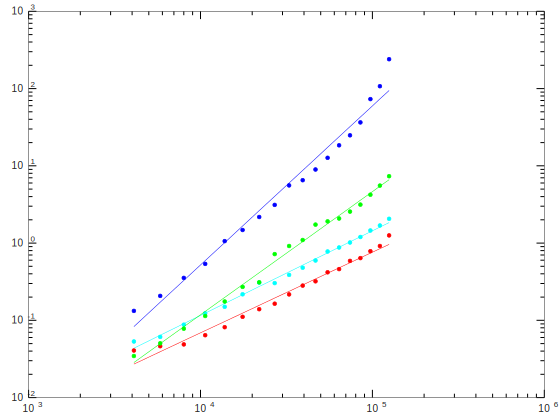

In [10]:
[n,t_LU,t_PCG,t_PCG_NP,t_openblas]=TestOrderOperationsALL(8,25,1);

j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8

Conjugate gradient (red):
Ajuste lineal: y=0.532795*x+-0.229883 r^2=0.998374

GC Precondicionado (blue):
Ajuste lineal: y=0.312031*x+-0.761073 r^2=0.949770


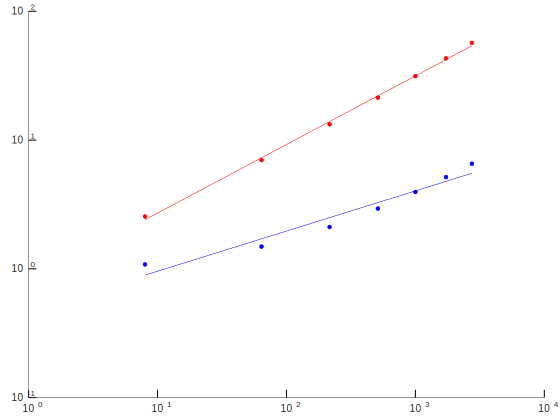

In [2]:
function [n,cn,cn_pc]=Condition(n0,nf,step)
    j = 1;
    for n=n0:step:nf
        N = 8*n^3;
        A = GenerateSparseMatrix(n);
        cn(j) = cond(A);
        [l,u] = ilu(A);
        cn_pc(j) = cond(inv(u)*inv(l)*A);
        j = j+1
    end
    n=n0:step:nf;
    x=8*n.^3;
    
    hold on;
    loglog(x,cn,"r.");
    printf("\nConjugate gradient (red):\n");
    [a,b,r2] = LinearRegression(log(x),log(cn));
    hold on;
    loglog(x,exp(a*log(x)+b),"r");
    
    hold on;
    loglog(x,cn_pc,"b.");
    printf("\nGC Precondicionado (blue):\n")
    [a,b,r2] = LinearRegression(log(x),log(cn_pc));
    hold on;
    loglog(x,exp(a*log(x)+b),"b");
endfunction

[n,cn,cn_pc] = Condition(1,7,1);

n0 =  1
nf =  7
step =  1

Conjugate gradient (red):
Ajuste lineal: y=0.532795*x+-0.229883 r^2=0.998374

GC Precondicionado (blue):
Ajuste lineal: y=0.312031*x+-0.761073 r^2=0.949770


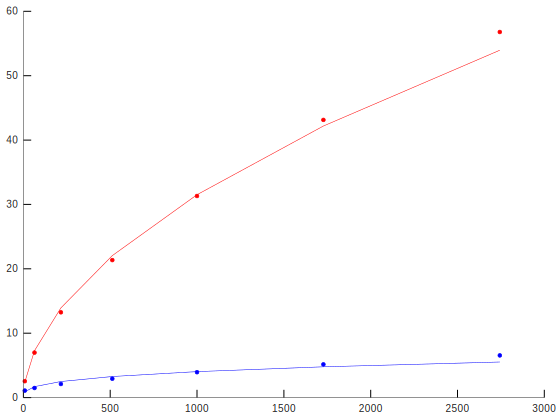

In [20]:
n0=1
nf=7
step=1
n=n0:step:nf;
    x=8*n.^3;
    
    hold on;
    plot(x,cn,"r.");
    printf("\nConjugate gradient (red):\n");
    [a,b,r2] = LinearRegression(log(x),log(cn));
    hold on;
    plot(x,exp(a*log(x)+b),"r");
    
    hold on;
    plot(x,cn_pc,"b.");
    printf("\nGC Precondicionado (blue):\n")
    [a,b,r2] = LinearRegression(log(x),log(cn_pc));
    hold on;
    plot(x,exp(a*log(x)+b),"b");

In [15]:
function [n,cn,cn_pc]=Condition(n0,nf,step)
    j = 1;
    for n=n0:step:nf
        A = rand(n,n);
        cn(j) = cond(A);
        [l,u] = ilu(A);
        cn_pc(j) = cond(inv(u)*inv(l)*A);
        j = j+1
    end
    n=n0:step:nf;
    x=n;
    
    hold on;
    loglog(x,cn,"r.");
    printf("\nConjugate gradient (red):\n");
    [a,b,r2] = LinearRegression(log(x),log(cn));
    hold on;
    loglog(x,exp(a*log(x)+b),"r");
    
    hold on;
    loglog(x,cn_pc,"b.");
    printf("\nGC Precondicionado (blue):\n")
    [a,b,r2] = LinearRegression(log(x),log(cn_pc));
    hold on;
    loglog(x,exp(a*log(x)+b),"b");
endfunction

[n,cn,cn_pc] = Condition(1,7,1);

error: ilu: A must be a sparse square matrix
error: called from
    ilu at line 170 column 5
    Condition at line 6 column 14
